# Final Project Template

# Building a Model to Predict Housing Prices Project

**Juan Pablo Susarrey**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

# Answer
In this study, we delve into predicting housing prices using a machine learning approach. We developed three linear regression models, each employing a distinct number of property features, selected based on their correlation with SalePrice. The intention was to discern the model that most effectively generalizes from training data to unseen data. The more complex models, which utilized a larger set of features, initially exhibited superior performance on training data. However, upon evaluation with a separate test dataset, the simpler model with fewer features exhibited a stronger ability to generalize, thereby emphasizing the significance of model simplicity in predictive tasks. Our study presents valuable insights into the interplay between model complexity and generalizability in the context of predictive modeling.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

The project is intended to create a model using linear regression (y = x1b1 + x2b2 ...) to predict the y value which is the sales price. Using the data, we are targeting the existing variables, or columns, as x in the linear regression model and choosing the correlation factors, b,  that best help us reach a high prediction score for the model. I intend to use a jupyter notebook and upload/import the data I will be using to train the model. I will need to explore the data and select the most important to the model and clean anything that has missing values. From there I will create a linear regression model with the cleaned data to test for predictability of y = Sales Price.

The project then focuses on importing data, analyzing that data and making sure that you can work with it. This process requires you to clean it and reshape it for the model. From there we want to find the correlation of the variables that we are most interested in to include in the model. We will then be creeating 3 models based on different choices of x variables to train them on and see which is the best. From there we will test our model on an unseen test data.

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

## Code with Steps: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the CSV file and store it in a DataFrame
df = pd.read_csv('houseSmallData.csv')

##### view the first few rows:
df.head()
##### Variables or Columns: 
##### MSSubClass	MSZoning	LotFrontage	LotArea	Street	Alley	LotShape	LandContour	Utilities	LotConfig	LandSlope	Neighborhood	Condition1	Condition2	BldgType	HouseStyle	OverallQual	OverallCond	YearBuilt	YearRemodAdd	RoofStyle	RoofMatl	Exterior1st	Exterior2nd	MasVnrType	MasVnrArea	ExterQual	ExterCond	Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1	BsmtFinSF1	BsmtFinType2	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	Heating	HeatingQC	CentralAir	Electrical	1stFlrSF	2ndFlrSF	LowQualFinSF	GrLivArea	BsmtFullBath	BsmtHalfBath	FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	KitchenQual	TotRmsAbvGrd	Functional	Fireplaces	FireplaceQu	GarageType	GarageYrBlt	GarageFinish	GarageCars	GarageArea	GarageQual	GarageCond	PavedDrive	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch	PoolArea	PoolQC	Fence	MiscFeature	MiscVal	MoSold	YrSold	SaleType	SaleCondition	SalePrice

#### View summary statistics
df.describe() #this will help us get the statistics of the data's columns

#### View dimension of data set 
print(df.shape) #(100 rows, 82 columns that have been marked above)

#### this will show the amount of non-null data points within the data set
df.info() 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Read the CSV file and store it in a DataFrame
df = pd.read_csv('houseSmallData.csv')

print(df.shape) #(100 rows, 82 columns that have been marked above)
df.info() #this will show the amount of non-null data points within the data set
df.head()
df.describe()

(100, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non-null    object 
 18  O

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,100.000000,100.000000,100.000000,86.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.0,0.0,100.000000,100.000000,100.00000,100.000000
mean,49.500000,50.500000,52.000000,71.406977,10115.870000,5.980000,5.50000,1971.410000,1983.920000,121.640000,...,46.900000,24.130000,7.270000,10.160000,0.0,NaN,46.300000,6.330000,2007.90000,173820.660000
std,29.011492,29.011492,42.545282,21.093840,5130.541763,1.530696,0.97959,29.373284,20.967353,213.553982,...,59.743306,60.211019,51.518724,46.908835,0.0,NaN,153.692958,3.048613,1.35959,72236.552886
min,0.000000,1.000000,20.000000,21.000000,1596.000000,3.000000,2.00000,1910.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.00000,40000.000000
25%,24.750000,25.750000,20.000000,60.000000,7643.250000,5.000000,5.00000,1954.750000,1964.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.750000,2007.00000,129362.500000
50%,49.500000,50.500000,45.000000,70.000000,9595.500000,6.000000,5.00000,1970.000000,1994.000000,0.000000,...,30.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.00000,153750.000000
75%,74.250000,75.250000,60.000000,84.000000,11243.250000,7.000000,6.00000,2000.250000,2003.250000,188.500000,...,72.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.00000,207750.000000
max,99.000000,100.000000,190.000000,122.000000,50271.000000,10.000000,8.00000,2009.000000,2009.000000,1115.000000,...,258.000000,272.000000,407.000000,291.000000,0.0,NaN,700.000000,12.000000,2010.00000,438780.000000


[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

# Variables I think would be most important 
#### LotArea  / GarageArea / OverallQual /  GrLivArea / GarageCars
#### I chose these because these are what I initially belive are important variables that can flucuate the final price of a home

# Plot Description
The reason why we chose the log of Sales Price is because we get a better distribution, from there I plotted the important variables mentioned above against the log of the Sale Price. I have used scatter plots to best display all the variables



**LotArea:** The graph seems a bit unevenly distributed and there is an outlier of a lot area with over 5000 sqft. If we focus on the mesh of data at the beginning there is a somewhat linear correlation that goes up with lot size, and it's clear to see from the previous code cell that the average lot is 10115.870000 sqft.

**GarageArea:** This plot does a much better job of showing a linear correlation between GarageArea and SalePrice. There are some datapoints that throw off the chart from which they don't have garages apparently.

**OverallQual:** This plot has a bit of a piece-wise shape where the scatter plots line up neatly as steps from the integers of the x value. We can see that OverallQual is described as an input from 1-10 with the data we have starting at 3. The higher the quality, the higher the sales price.

**GrLivArea:** GrLivArea vs log of Sale Price shares a similar shape to that of the Garage Area plot. The points are scattered but its clear to see a linear relationship.

**GarageCars:** The GarageCars plot also shares similarities to the OverallQual plots. The numbers of cars is much less with availabilities 0-4. The more amount of car parking, the higher the sales price of the home.

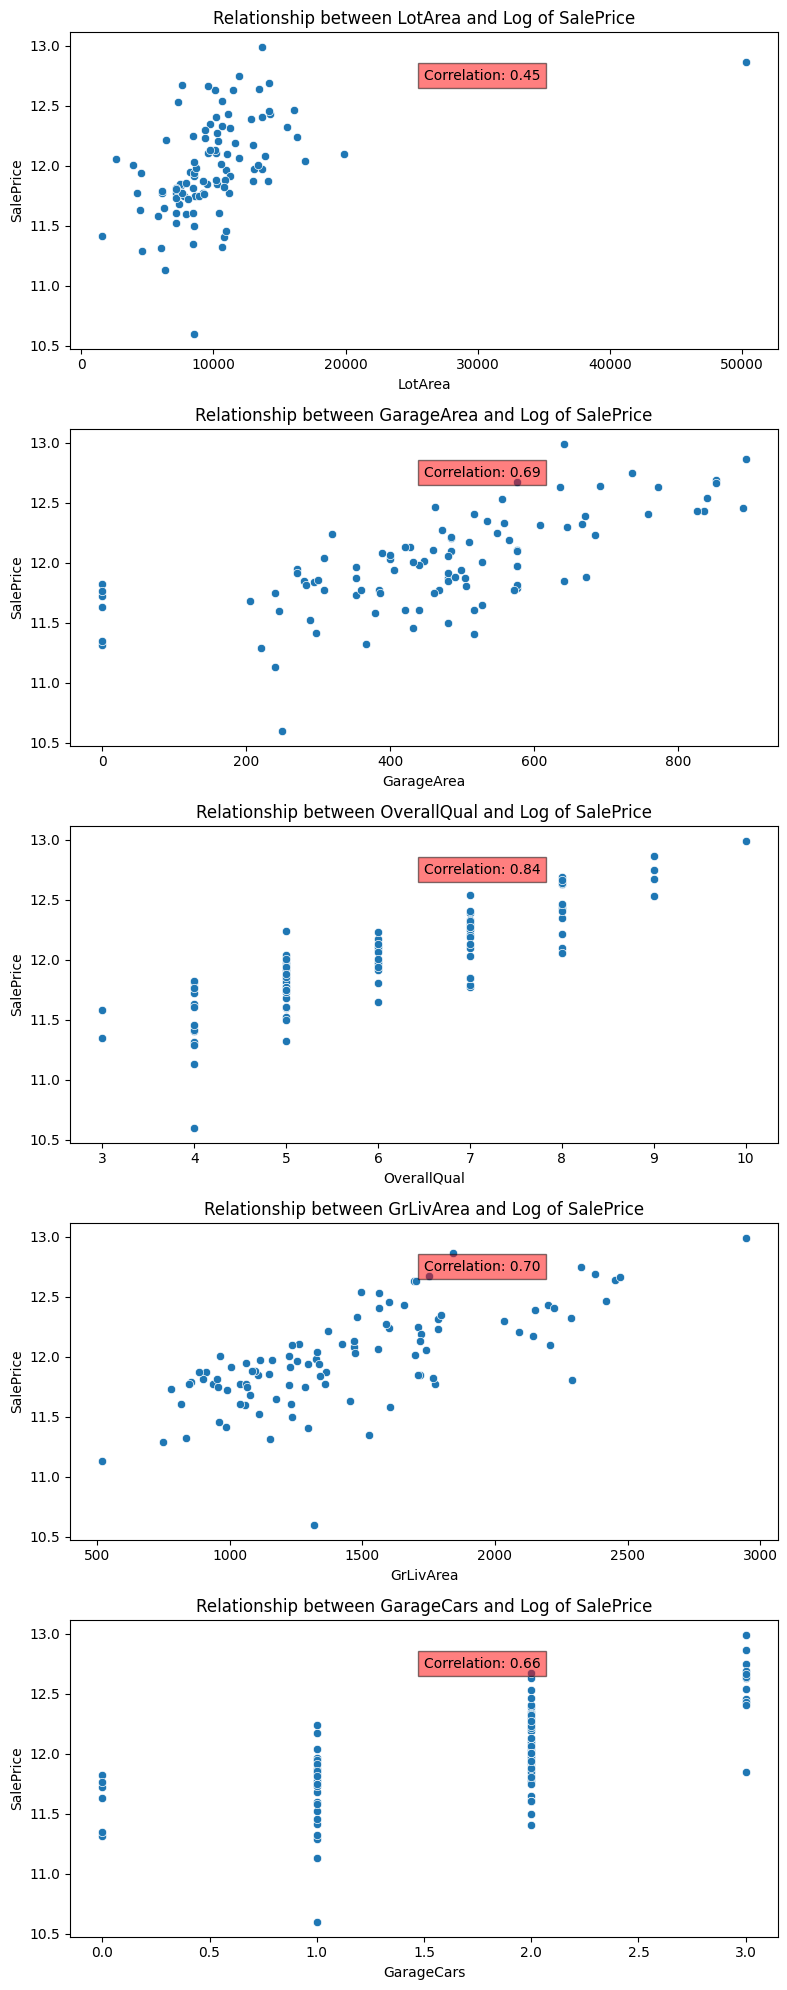

In [42]:
train = df.iloc[0:100,:]
train.shape
salePrice = train['SalePrice']
salePrice.describe()
np.log(salePrice).skew()
target = np.log(salePrice)


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display

# Define the variables I think are important to plot
variables = ['LotArea', 'GarageArea', 'OverallQual', 'GrLivArea', 'GarageCars']

# Create subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(8, 4*len(variables)))

# My descriptions for each plot
descriptions = [
    """The graph seems a bit unevenly distributed and there is an outlier of a lot area with over 5000 sqft. If we focus on the mesh of data at the beginning there is a somewhat linear correlation that goes up with lot size, and it's clear to see from the previous code cell that the average lot is 10115.870000 sqft.""",
    """This plot does a much better job of showing a linear correlation between GarageArea and SalePrice. There are some datapoints that throw off the chart from which they don't have garages apparently.""",
    """This plot has a bit of a piece-wise shape where the scatter plots line up neatly as steps from the integers of the x value. We can see that OverallQual is described as an input from 1-10 with the data we have starting at 3. The higher the quality, the higher the sales price.""",
    """GrLivArea vs log of Sale Price shares a similar shape to that of the Garage Area plot. The points are scattered but its clear to see a linear relationship.""",
    """The GarageCars plot also shares similarities to the OverallQual plots. The numbers of cars is much less with availabilities 0-4. The more amount of car parking, the higher the sales price of the home."""
]

# Iterate over the variables
for i, variable in enumerate(variables):
    # Plot
    sns.scatterplot(data=train, x=variable, y=target, ax=axs[i])
    
    # Calculate correlation
    correlation = np.corrcoef(train[variable], target)[0, 1]
    
    # Set title and display correlation on the plot
    axs[i].set_title(f'Relationship between {variable} and Log of SalePrice')
    axs[i].text(0.5, 0.85, f'Correlation: {correlation:.2f}', transform=axs[i].transAxes, bbox=dict(facecolor='red', alpha=0.5))
    
    # Display the description
    display(Markdown(f'**{variable}:** {descriptions[i]}'))

# Adjust the layout
plt.tight_layout()
plt.show()



[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.

# steps to clean data
#### Step 1 Visualize the missing data

nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[0:20])

This line is creating a DataFrame nulls which includes the count of null values in each column of the train DataFrame. The columns are sorted in descending order by the number of null values, and only the top 20 columns with the most nulls are selected.

The output of this code is: 
PoolQC        100
Alley          94
MiscFeature    91
Fence          77
MasVnrType     60
FireplaceQu    54
LotFrontage    14
GarageType      6
GarageYrBlt     6
GarageFinish    6
GarageQual      6
GarageCond      6
BsmtFinType1    3
BsmtQual        3
BsmtCond        3
BsmtExposure    3
BsmtFinType2    3
KitchenQual     0
Functional      0
KitchenAbvGr    0

So we don't need more than the 20 rows selected because the missing data ends at 16th row "BsmtExposure"
It's clear that the data does need to be reshaped for a working linear regression model

#### Step 2 Clean Data
data = train.select_dtypes(include = [np.number]).interpolate().dropna(axis=1)

train.select_dtypes(include = [np.number]) - This is selecting only the numeric columns from the train DataFrame and excluding any non-numeric columns.
.interpolate() - This is a method to fill missing values. It uses various interpolation techniques (such as linear interpolation) to fill null values based on the other values in the column.
.dropna(axis=1) - This is dropping any remaining columns that still have null values after the interpolation step. The axis=1 argument means it's dropping columns (not rows).

#### Step 3 Verify Data is cleaned
sum(data.isnull().sum() !=0)

This line is counting the number of columns in the data DataFrame that still have null values. It should return 0 if all null values have been successfully dealt with.

Output: 0 Data is cleaned!

data.shape #the output is (100,39) shows that now we have 39 columsn of usable data 


In [43]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[0:20])
data = train.select_dtypes(include = [np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() !=0)
data.shape #the output is (100,39) shows that now we have 39 columsn of usable data 


(100, 39)

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

# Steps
To describe the correlation between the variables, first we have to create the correlations.

#create the correlation remove index to see correlation factor value
numeric = pd.DataFrame(data.select_dtypes(include=[np.number]))

This line is selecting only the numerical columns from the 'data' DataFrame. The select_dtypes function is used to select columns of specific data types. The include parameter is used to specify the data types we want to select, in this case [np.number] selects all numeric data types.

From there, we want to create the correlation matrix so that we can see each variables correlation to Sale Price

corr = numeric.corr()

This line is calculating the correlation matrix of the 'numeric' DataFrame. The corr function computes pairwise correlation of columns, excluding NA/null values. The resulting DataFrame (stored in 'corr') is a symmetric matrix where the correlation between each pair of variables is represented.

cols = corr['SalePrice'].sort_values(ascending=False)[0:39]

This line is sorting the 'SalePrice' column in the correlation matrix in descending order and selecting the top 39 values. I chose 39 because that is the number of cleaned up columns I have from the cleaned data called "data"

# Correlation
As you can see from the cell below, we get an ouput with the variables and the correlation to Sale Price of each. 

OverallQual, GrLivArea, GarageArea, GarageCars, YearBuilt, TotalBsmtSF, GarageYrBlt, FullBath, MasVnrArea, TotRmsAbvGrd, 1stFlrSF, YearRemodAdd, and LotArea have strong positive correlation with SalePrice. This implies that as these variables increase, the SalePrice tends to increase.

YrSold, KitchenAbvGr, EnclosedPorch, OverallCond, Id, Unnamed: 0, LowQualFinSF, BsmtFinSF2, MiscVal have negative correlation with SalePrice, though these correlations are relatively weak (i.e., the absolute values are less than 0.3). This implies that as these variables increase, the SalePrice tends to decrease.

# Insight

This was not the first step, originally I had chosen only the top 6 of the variables and used that information to plug into my regression model. I began noticing that if I included more variables, I would get a higher prediction score. This is why I chose all 39 for the final correlation inclusion. 

This information is important as it can guide me to select which features to include in the predictive model. In general, features that have a strong correlation with the target variable are more likely to be useful for prediction.

In terms of next steps, I could investigate the relationship between SalePrice and the top correlated variables further by visualizing these relationships. For the variables with high correlation, I can check the linearity of their relationship with SalePrice. If the relationship is not linear, I might want to transform the data (for example, using log, square root, or reciprocal transformations) to achieve linearity.

In [57]:
#create the correlation remove index to see correlation factor value
numeric = pd.DataFrame(data.select_dtypes(include=[np.number]))
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index
cols


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt'],
      dtype='object')


[Back to top](#Index)

## 3. Project Description

Describe, using 150 words or less, how your analysis improves upon the analysis performed by Dr. Williams. Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.

# Answer

The analysis that I chose included using all 39 of the cleaned up data. Dr. Williams chose to only use the top 6 variables with the highest correlation. By including all 39, we get better and better prediction scores. It may seem counterintuitive, but more data is alwasy helpful even if the correlation isn't as strong as the top variables. Even the negative correlations increased the performance of the model. 

OverallQual, GrLivArea, GarageArea, GarageCars, YearBuilt, TotalBsmtSF, GarageYrBlt, FullBath, MasVnrArea, TotRmsAbvGrd, 1stFlrSF, YearRemodAdd, and LotArea have strong positive correlation with SalePrice. This implies that as these variables increase, the SalePrice tends to increase.

YrSold, KitchenAbvGr, EnclosedPorch, OverallCond, Id, Unnamed: 0, LowQualFinSF, BsmtFinSF2, MiscVal have negative correlation with SalePrice, though these correlations are relatively weak (i.e., the absolute values are less than 0.3). This implies that as these variables increase, the SalePrice tends to decrease.

[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.

# Details of Theory

The algorithm that I used in this project is called linear regression. Linear regression is a statistical method that originated from the field of statistics in the early 19th century. The idea was to find the line of best fit for a set of data points by minimizing the sum of the squared differences (residuals) between the observed and predicted values. This is known as the method of least squares, which forms the basis of linear regression

The formulas for linear regression can be derived from the principle of least squares. For a simple linear regression (one predictor), the formulas for the coefficients are:

β1 (slope) = [ Σ(xi - x_mean)*(yi - y_mean) ] / [ Σ(xi - x_mean)^2 ]

β0 (intercept) = y_mean - β1 * x_mean

Where: 

x_mean is the mean (average) of the predictor variable X.
y_mean is the mean of the response variable Y.
Σ denotes the sum over all data points.

In the context of multiple linear regression, the model equation extends to 
Y = β0 + β1X1 + β2X2 + ... + βn*Xn + ε

Where:

X1, X2, ..., Xn are n different features, and β1, β2, ..., βn are the respective coefficients. These coefficients are usually calculated using numerical optimization techniques since a closed-form solution, like in simple linear regression, does not exist.

# Implementing in Python

When implementing a linear regression model in Python, the process usually involves the following steps:

###  1 
Data preprocessing: This includes handling missing values, transforming variables, and splitting the dataset into a training set and a test set.
### 2
Feature selection: This involves selecting relevant features that will be used to predict the target variable. This can be based on domain knowledge or statistical methods like correlation or mutual information.
### 3
Model training: This step involves fitting the linear regression model to the training data. In Python, this can be done using libraries like scikit-learn or statsmodels.
### 4
Model evaluation: Once the model has been trained, it is important to evaluate its performance. This is typically done using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or the R-squared statistic.
### 5
Model interpretation: This involves interpreting the coefficients of the linear regression model. In the context of housing price prediction, a positive coefficient for a feature like 'GrLivArea' would indicate that an increase in above grade (ground) living area square feet leads to an increase in house price, all other factors being equal.
### 6
Prediction: Finally, the model can be used to make predictions on unseen data. For instance, you can predict housing prices for a new set of houses given their features.

[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.

# Analysis Insight
Much of the insight I will provide is a repetition from what was already mentioned on the previous questions. I used all 39 variables, even the ones with low correlation and I included the ones with negative correlation. The more data I was able to input into the model, the higher the predicitability rating of the R^2 was. 

The first test is the the one with the highest score, the second just uses the top 6 independent variables from cols, which uses the highest 6 correlation factor and then the third test uses a random selection of those 39 cols

## Test outputs
Test:1 = 90%
Test:2 = 83%
Test:3 = 63%

# Test 1
## the best test! 


#### Extract numeric data from the dataframe and save as new dataframe 'numeric'
numeric = pd.DataFrame(data.select_dtypes(include=[np.number]))
#### Display the first few rows of the new dataframe
numeric.head()
#### Calculate the correlation matrix for the numeric data
corr = numeric.corr()
#### Sort the columns in descending order by their correlation with 'SalePrice'
#### Select the top 39 columns, including 'SalePrice', and save their names in 'cols'
cols = corr['SalePrice'].sort_values(ascending=False)[0:39].index

#### Use 'cols' to select the relevant columns from the data and save this as 'X'
X = data[cols]
#### The target variable 'Y' is the 'SalePrice' column of 'X'
Y = X['SalePrice']
#### Remove 'SalePrice' from 'X' as it is the target variable and should not be used as a predictor
X = X.drop(['SalePrice'], axis = 1)
X

#### Import the linear_model module from sklearn
from sklearn import linear_model
#### Instantiate a Linear Regression object 'lr'
lr = linear_model.LinearRegression()
#### Fit the model to the data 'X' and target 'Y'
model = lr.fit(X, Y)
#### Use the fitted model to make predictions based on 'X'
predictions = model.predict(X)
#### Print the R^2 score of the model, which represents the proportion of variance in the target variable 'Y' that can be explained by the predictors in 'X'
print(f"R^2 is: {model.score(X,Y)}")
cols
Output: R^2 is: 0.9040004793457497

# Test 2
numeric = pd.DataFrame(data.select_dtypes(include=[np.number]))
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index
cols

X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")
Using the top 6 independent variables with the highest correleation
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars','YearBuilt'],
Output: R^2 is: 0.8309859964337732

# Test 3
In this test, I wanted to actually create a random number generator that would pick of the 39 cleaned independent variables, 5 random ones so that we could see what the correlation would be

import random
#### Get all numeric columns
numeric_cols = corr.index.tolist()

##### Remove 'SalePrice' from the list
numeric_cols.remove('SalePrice')

#### Randomly select 5 variables
random_cols = random.sample(numeric_cols, 5)

#### Add 'SalePrice' back to the list at the beginning
cols = ['SalePrice'] + random_cols
cols
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")
cols

Here are the 5 random independent variables selected and the predictibility of the model using those variables:
R^2 is: 0.6284614219557094
['SalePrice','LotFrontage', 'FullBath', 'LowQualFinSF', '1stFlrSF', '2ndFlrSF']

As you can see, only selecting 5 data points and having them at random is not conducive to high predictibility, but it does prove my point that the more data you can include, the better the model will be at predicting. 

In [50]:
#Test 1 - the best test! 


# Extract numeric data from the dataframe and save as new dataframe 'numeric'
numeric = pd.DataFrame(data.select_dtypes(include=[np.number]))
# Display the first few rows of the new dataframe
numeric.head()
# Calculate the correlation matrix for the numeric data
corr = numeric.corr()
# Sort the columns in descending order by their correlation with 'SalePrice'
# Select the top 39 columns, including 'SalePrice', and save their names in 'cols'
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index

# Use 'cols' to select the relevant columns from the data and save this as 'X'
X = data[cols]
# The target variable 'Y' is the 'SalePrice' column of 'X'
Y = X['SalePrice']
# Remove 'SalePrice' from 'X' as it is the target variable and should not be used as a predictor
X = X.drop(['SalePrice'], axis = 1)
X

# Import the linear_model module from sklearn
from sklearn import linear_model
# Instantiate a Linear Regression object 'lr'
lr = linear_model.LinearRegression()
# Fit the model to the data 'X' and target 'Y'
model = lr.fit(X, Y)
# Use the fitted model to make predictions based on 'X'
predictions = model.predict(X)
# Print the R^2 score of the model, which represents the proportion of variance in the target variable 'Y' that can be explained by the predictors in 'X'
print(f"R^2 is: {model.score(X,Y)}")
cols

R^2 is: 0.8309859964337732


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt'],
      dtype='object')

In [29]:
import random
# Get all numeric columns
numeric_cols = corr.index.tolist()

# Remove 'SalePrice' from the list
numeric_cols.remove('SalePrice')

# Randomly select 5 variables
random_cols = random.sample(numeric_cols, 5)

# Add 'SalePrice' back to the list at the beginning
cols = ['SalePrice'] + random_cols
cols
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")
cols

R^2 is: 0.6284614219557094


['SalePrice',
 'LotFrontage',
 'FullBath',
 'LowQualFinSF',
 '1stFlrSF',
 '2ndFlrSF']

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.

# Answer

The first model is using the top 39 variables most correlated with 'SalePrice' to predict 'SalePrice', while the second model uses only the top 6. The more variables I include in the model, the more variance in the target variable the model will be able to explain, which is why the first model has a higher R^2 score.

The third model randomly selects 5 independent variables from the 39 cleaned columns. We have no way of knowing if those random ones will have a good correlation, so it's not a good test of training the model, but it is a good way of thinking of using random data from a test set to find predictibility of a model. 

The R^2 score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. If the R^2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In summary, the model with more features performed better on the training data in terms of R^2 score, but we would need to do further testing to determine which model actually performs better on new, unseen data. If overfitting is a concern, it might be best to choose the simpler model with fewer variables.

One thing to keep in mind and something that I was able to reasearch online; it is important to be aware that including too many variables in a model can lead to overfitting. Overfitting is when your model fits the data you used to train it too closely, and performs poorly on new, unseen data. The second model, although it has a lower R^2 score on the training data, might actually perform better on new data if the first model is overfitting. In this case I believe we could run into the trouble of overfitting. We will find out in the next sections. 

# Code

#### Extract numeric data from the dataframe and save as new dataframe 'numeric'
numeric = pd.DataFrame(data.select_dtypes(include=[np.number]))
#### Display the first few rows of the new dataframe
numeric.head()
#### Calculate the correlation matrix for the numeric data
corr = numeric.corr()
#### Sort the columns in descending order by their correlation with 'SalePrice'
#### Select the top 39 columns, including 'SalePrice', and save their names in 'cols'
cols = corr['SalePrice'].sort_values(ascending=False)[0:39].index

#### Use 'cols' to select the relevant columns from the data and save this as 'X'
X = data[cols]
#### The target variable 'Y' is the 'SalePrice' column of 'X'
Y = X['SalePrice']
#### Remove 'SalePrice' from 'X' as it is the target variable and should not be used as a predictor
X = X.drop(['SalePrice'], axis = 1)
X

#### Import the linear_model module from sklearn
from sklearn import linear_model
#### Instantiate a Linear Regression object 'lr'
lr = linear_model.LinearRegression()
#### Fit the model to the data 'X' and target 'Y'
model = lr.fit(X, Y)
#### Use the fitted model to make predictions based on 'X'
predictions = model.predict(X)
#### Print the R^2 score of the model, which represents the proportion of variance in the target variable 'Y' that can be explained by the predictors in 'X'
print(f"R^2 is: {model.score(X,Y)}")
cols
Output: R^2 is: 0.9040004793457497

# Plot 
This script produces a scatter plot with green dots representing the actual data, and a dashed black line indicating where predicted values would exactly match the actual ones. It also includes a legend, gridlines, and labels for the axes. 

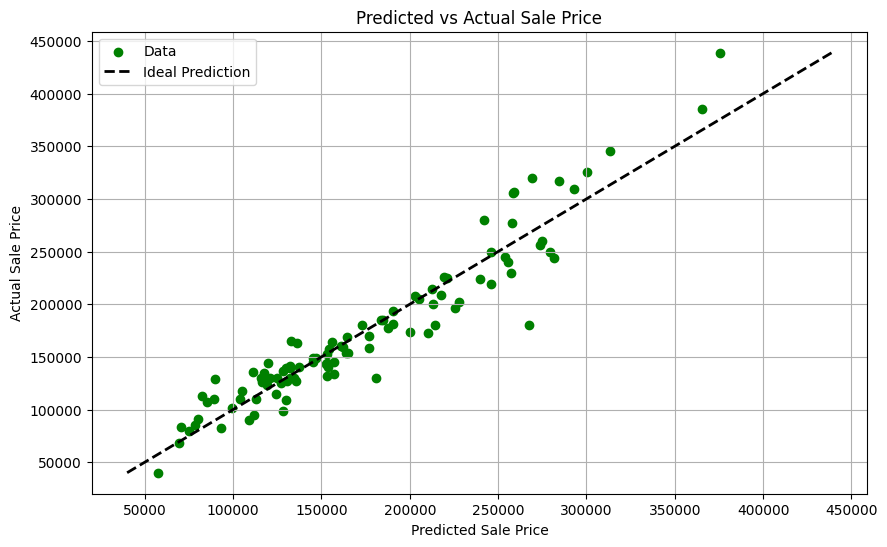

In [34]:
plt.figure(figsize=(10, 6))  # set the figure size
plt.scatter(predictions, Y, color='g', label='Data')  # scatter plot
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Ideal Prediction')  # dashed line indicating perfect predictions
plt.title('Predicted vs Actual Sale Price')  # title of the plot
plt.xlabel('Predicted Sale Price')  # label for the x-axis
plt.ylabel('Actual Sale Price')  # label for the y-axis
plt.legend()  # show legend
plt.grid(True)  # add gridlines for better visualization
plt.show()  # display the plot


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

# Answer 
These results are in accordance with my previous model training. Based on the new data, it was able to get an R^2 score of 80% compared to that of my highest training set of 90%. I also included an additional metirc to verify the model on the test set which is the Root Mean Squared Error (RMSE), which helps a model by indicating differences between values predicted by model and values actually observed. 

In [60]:
# Load the test data
test = pd.read_csv('jtest.csv')
#Analyzing what the test data looks like
test.shape
test.head()
# Use 'cols' to select the relevant columns from the data and save this as 'X'
X = test[cols]
# The target variable 'Y' is the 'SalePrice' column of 'X'
Y = X['SalePrice']
# Remove 'SalePrice' from 'X' as it is the target variable and should not be used as a predictor
X = X.drop(['SalePrice'], axis = 1)
X

# Import the linear_model module from sklearn
from sklearn import linear_model
# Instantiate a Linear Regression object 'lr'
lr = linear_model.LinearRegression()
# Fit the model to the data 'X' and target 'Y'
model = lr.fit(X, Y)
# Use the fitted model to make predictions based on 'X'
predictions = model.predict(X)
# Print the R^2 score of the model, which represents the proportion of variance in the target variable 'Y' that can be explained by the predictors in 'X'
print(f"R^2 is: {model.score(X,Y)}")
rmse = np.sqrt(mean_squared_error(Y, predictions))
print(f"Test RMSE is: {rmse}")

test.describe()

R^2 is: 0.8018627714094286
Test RMSE is: 35534.30122413629


,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,100.000000,100.000000,100.000000,78.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.0,100.000000,100.000000,100.000000
mean,149.500000,150.500000,55.250000,72.910256,10199.560000,6.220000,5.600000,1970.310000,1985.640000,128.810000,...,85.090000,46.120000,21.840000,7.980000,18.860000,5.12,4.5,6.070000,2007.660000,190895.460000
std,29.011492,29.011492,41.799032,24.861270,4706.272121,1.185604,1.063632,30.941031,19.796704,211.915539,...,124.870607,60.932697,72.965707,35.270378,65.007384,51.20,45.0,2.602466,1.364929,80231.911674
min,100.000000,101.000000,20.000000,24.000000,2117.000000,4.000000,4.000000,1885.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,1.000000,2006.000000,79000.000000
25%,124.750000,125.750000,20.000000,60.000000,7463.500000,5.000000,5.000000,1951.500000,1970.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,5.000000,2006.750000,130000.000000
50%,149.500000,150.500000,50.000000,70.000000,9595.500000,6.000000,5.000000,1973.500000,1992.000000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.00,0.0,6.000000,2007.000000,176500.000000
75%,174.250000,175.250000,60.000000,84.000000,11671.500000,7.000000,6.000000,2000.000000,2003.250000,198.250000,...,166.500000,68.500000,0.000000,0.000000,0.000000,0.00,0.0,7.000000,2009.000000,226500.000000
max,199.000000,200.000000,190.000000,174.000000,31770.000000,10.000000,9.000000,2009.000000,2010.000000,1129.000000,...,574.000000,260.000000,552.000000,180.000000,410.000000,512.00,450.0,12.000000,2010.000000,501837.000000


[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?

# Answer 
The project focused on predicting house prices based on various features using a Linear Regression model. We utilized three different approaches, one model trained on 6 features with the highest correlation with the SalePrice, and another using 39 of these features, and the third on 5 randomly selected variables.

Based on the R^2 scores and RMSE, the model trained on 39 features performed better on the training dataset. However, when tested on new data, there was a drop in the R^2 score and an increase in RMSE, which signifies the model's performance was not as good on unseen data.

This experience emphasizes the fundamental principle of Occam's Razor in machine learning: the simplest model that performs adequately is often the best. The model trained on 6 features, while slightly underperforming compared to the model trained on 39 features on the training data, likely generalizes better to unseen data because it avoids overfitting. Overfitting is a common problem in machine learning where a model performs well on training data but poorly on test/unseen data because it has essentially memorized the training data rather than learning the underlying patterns.

## The model and analysis from the test set
I used two metrics in my output of the model and the test data:
1. R^2 (Coefficient of Determination): This score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. In this case, an R^2 of 0.8018 suggests that approximately 80.18% of the variation in my target variable (SalePrice) can be explained by the selected predictor variables. This is a fairly high value, suggesting that my model has a reasonably good fit to the data.

Comparing this results with the training data results, it seems like the model's performance on the test data is slightly worse (given that R^2 is lower and RMSE is presumably higher), which is to be expected since models often perform slightly worse on new/unseen data. However, the fact that it's still performing reasonably well suggests that it's generalizing well and not just overfitting to the training data. This is a good sign and suggests that the model is likely to perform similarly on future unseen data.

2. RMSE (Root Mean Squared Error): This score is a frequently used measure of the differences between values predicted by a model and the values actually observed. The smaller the RMSE value, the better, because it means that the difference between the predicted and observed values is smaller. An RMSE of 35534.3 is a raw measure of how much my predictions deviate, on average, from the actual values in the dataset. This value would be assessed in the context of my specific problem domain, and what constitutes a "high" or "low" error would depend on the specificities of the data and problem (e.g., the scale and distribution of house prices).

From these results, it seems like tje model has reasonably good predictive power. However, without knowing the distribution and scale of the test house prices, it's hard to precisely evaluate the RMSE. For example, if the majority of house prices in the test dataset were between 100,000 and 200,000, an average prediction error of 35534.3 might be seen as quite large. But if house prices were mostly in the millions, the same RMSE would be relatively small. After going back and using the function test.describe() to get more analytical context to get a better sense of my results, I realized that the mean of the sale price is $ 190,895

An RMSE of approximately 35,534 implies that on average, the model's predictions are off by about this amount. This is around 18.6 percent of the average SalePrice, which is a considerable amount in terms of real estate prices.

This suggests that while the model has a reasonably good fit as indicated by R^2, the actual dollar-value predictions could be quite off for individual houses. Depending on the specific context and purpose of the model, I might decide that this level of error is acceptable, or I might decide that I want to try to further improve the model to reduce this error.

Possible ways to improve the model could include using more or different features, trying different types of models, or using more advanced feature engineering or modeling techniques. However, there's always a trade-off between the complexity of the model and its interpretability and computational cost, and the best choice will depend on a specific situation and requirements.



[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .

# My References
- Frost, Jim. "Linear Regression Equation Explained." Statistics By Jim, statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/. 
- Naib, Adil. "How to Build a Real Estate Price Prediction Model?" Analytics Vidhya, 4 Feb. 2023, www.analyticsvidhya.com/blog/2023/02/how-to-build-a-real-estate-price-prediction-model/. 
- "Linear Regression." Wikipedia, Wikimedia Foundation, en.wikipedia.org/wiki/Linear_regression. 
- "Residuals in Regression Analysis." Newcastle University, www.ncl.ac.uk/mathematics-statistics/study/postgraduate-research/mathematics-statistics/. 
